In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000862831"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000862831
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FINANCIAL INSTITUTIONS INC
Ticker,FISI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,53.0,1.741528e+01,3.337426e+00,12.51,14.87,16.61,19.6,24.52
interest income,59.0,2.699120e+07,4.349436e+06,23093000.00,24463000.00,25495000.00,26910500.0,41514000.00
net income,59.0,5.104610e+06,5.648910e+06,-28426000.00,3938500.00,5820000.00,7355000.0,12170000.00
net interest income,59.0,2.135403e+07,4.905697e+06,13956000.00,17320000.00,20941000.00,24131000.0,32029000.00
provision for loan losses,56.0,2.233482e+06,2.903072e+06,-1601000.00,1264250.00,1970500.00,2642250.0,21889000.00


# Plots

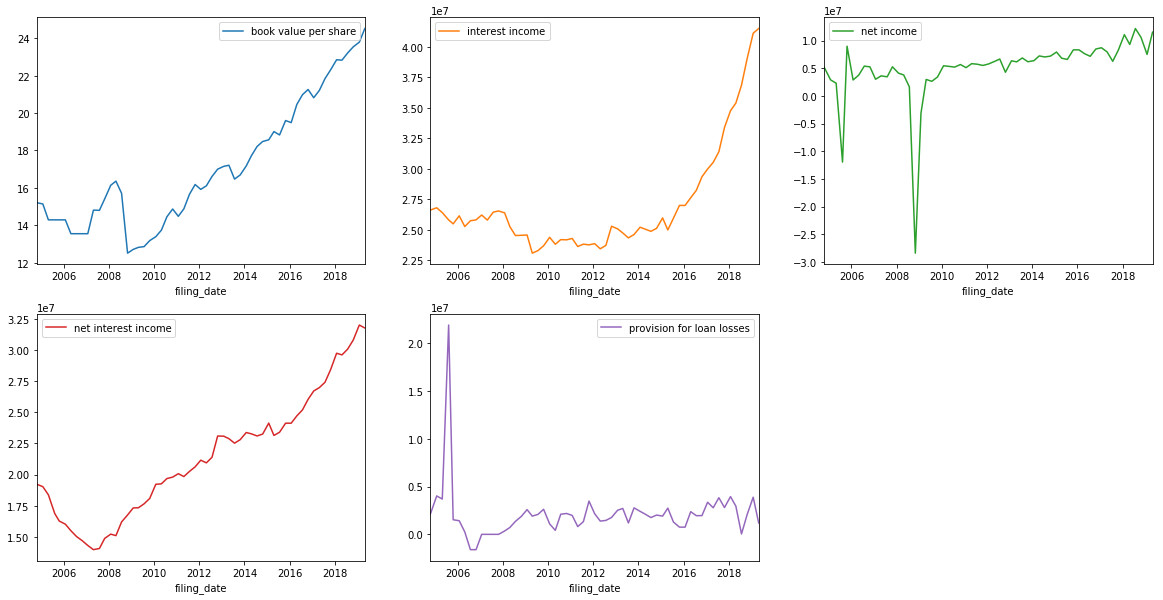

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000862831 book value per share       2005Q2 to 2005Q4: 3 periods  missing   
           book value per share       2006Q2 to 2006Q4: 3 periods  missing   
           interest income                                 2015Q4  missing   
           net income                                      2015Q4  missing   
           net interest income                             2015Q4  missing   
           provision for loan losses                       2006Q3  missing   
           provision for loan losses  2007Q2 to 2007Q3: 2 periods  missing   
           provision for loan losses                       2015Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0000862831 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()